In [1]:
def annotate_smarts_optimized(df, smarts_list, smiles_column='smiles', new_column='smarts'):
    from rdkit.Chem import PandasTools
    from rdkit import Chem

    # Add RDKit molecule column
    PandasTools.AddMoleculeColumnToFrame(df, smilesCol=smiles_column, molCol='Molecule', includeFingerprints=False)

    # Compile the SMARTS patterns
    smarts_mols = [(smarts, Chem.MolFromSmarts(smarts)) for smarts in smarts_list]

    # Function to find matches
    def find_matches(mol):
        if mol is None:
            return None
        matches = []
        for smarts, smarts_mol in smarts_mols:
            if mol.HasSubstructMatch(smarts_mol):
                matches.append(smarts)
        return matches if matches else None

    # Apply the function
    df[new_column] = df['Molecule'].apply(find_matches)

    # Optionally, drop the Molecule column
    df.drop(columns=['Molecule'], inplace=True)

    return df

In [2]:
smarts = ['C12CCCCC1C3C(CCC3)CC2', 'NN', 'a[C!R]C(=O)[OH]', '[#6]S(=O)(=O)N[#6]', 'c1ccccc1[NH2]', 'O=[S;X3]', '[S;X2&!R]', 'a[C!R](=O)a', 'C[F,Cl,Br,I]', 'C1CC1N', '[O]c1ccc([N])cc1', 'N1c2ccccc2Sc2ccccc12']

In [3]:
import pandas as pd

df = pd.read_csv('/Users/ed_aguilar/Downloads/XAI/Liver/Liver.csv')
df = df.rename(columns={'SMILES': 'smiles'})
df

,Drug Name,smiles,LiverTox Summary Statement,Hepatotoxicity Class,CAS,Alert 1,Alert 2,Alert 3,Alert 4,Alert 5,Alert 6,Alert 7,Alert 8,Alert 9,Alert 10,Alert 11,Alert 12,SPLIT,label
0,Acamprosate,OS(=O)(=O)CCCNC(=O)C,Acamprosate has been not been linked to serum ...,-1,CAS 77337-76-9,0,0,0,0,0,0,0,0,0,0,0,0,train,0
1,Moexipril,C(c1ccccc1)C[C@H](N[C@H](C(N1Cc2c(C[C@H]1C(O)=...,Moexipril is associated with a low rate of tra...,-1,CAS 103775-10-6,0,0,0,0,0,0,0,0,0,0,0,0,train,0
2,Quinapril,N1([C@@H](Cc2ccccc2C1)C(O)=O)C([C@@H](N[C@@H](...,Quinapril is associated with a low rate of tra...,-1,CAS 85441-61-8,0,0,0,0,0,0,0,0,0,0,0,0,train,0
3,Trandolapril,C1CC[C@@H]2C[C@H](N([C@@H]2C1)C([C@H](C)N[C@@H...,Trandolapril is associated with a low rate of ...,-1,CAS 87679-37-6,0,0,0,0,0,0,0,0,0,0,0,0,train,0
4,Aclidinium,C1C[N+]2(CCC1[C@H](C2)OC(=O)C(C3=CC=CS3)(C4=CC...,Aclidinium has not been implicated in causing ...,-1,CAS 320345-99-1,0,0,0,0,0,0,0,0,0,0,0,0,train,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,pemoline,C1=CC=C(C=C1)C2C(=O)N=C(O2)N,Withdrawn due to toxicity (hepatitis),1,CAS 2152-34-3,0,0,0,0,0,0,0,0,0,0,0,0,train,2
583,Trovafloxacin,C1[C@@H]2[C@@H](C2N)CN1C3=C(C=C4C(=O)C(=CN(C4=...,Withdrawn due to toxicity (hepatitis),1,CAS 147059-72-1,0,0,0,0,0,0,0,0,0,1,0,0,train,2
584,Deferasirox,C1=C/C(=C/2\N/C(=C\3/C=CC=CC3=O)/N(N2)C4=CC=C(...,Blackbox warning for heptatotoxicity,1,CAS 201530-41-8,0,1,0,0,0,0,0,0,0,0,0,0,train,2
585,Eltrombopag,CC1=C(C=C(C=C1)N2C(=O)C(=C(N2)C)N/N=C/3\C=CC=C...,Blackbox warning for heptatotoxicity,1,CAS 443130-00-5,0,1,0,0,0,0,0,0,0,0,0,0,train,2


In [5]:
df = annotate_smarts_optimized(df, smarts, smiles_column='smiles', new_column='smarts') 
df.loc[df['smarts'].isna(), 'smarts'] = '[]'
df

,Drug Name,smiles,LiverTox Summary Statement,Hepatotoxicity Class,CAS,Alert 1,Alert 2,Alert 3,Alert 4,Alert 5,Alert 6,Alert 7,Alert 8,Alert 9,Alert 10,Alert 11,Alert 12,SPLIT,label,smarts
0,Acamprosate,OS(=O)(=O)CCCNC(=O)C,Acamprosate has been not been linked to serum ...,-1,CAS 77337-76-9,0,0,0,0,0,0,0,0,0,0,0,0,train,0,[]
1,Moexipril,C(c1ccccc1)C[C@H](N[C@H](C(N1Cc2c(C[C@H]1C(O)=...,Moexipril is associated with a low rate of tra...,-1,CAS 103775-10-6,0,0,0,0,0,0,0,0,0,0,0,0,train,0,[]
2,Quinapril,N1([C@@H](Cc2ccccc2C1)C(O)=O)C([C@@H](N[C@@H](...,Quinapril is associated with a low rate of tra...,-1,CAS 85441-61-8,0,0,0,0,0,0,0,0,0,0,0,0,train,0,[]
3,Trandolapril,C1CC[C@@H]2C[C@H](N([C@@H]2C1)C([C@H](C)N[C@@H...,Trandolapril is associated with a low rate of ...,-1,CAS 87679-37-6,0,0,0,0,0,0,0,0,0,0,0,0,train,0,[]
4,Aclidinium,C1C[N+]2(CCC1[C@H](C2)OC(=O)C(C3=CC=CS3)(C4=CC...,Aclidinium has not been implicated in causing ...,-1,CAS 320345-99-1,0,0,0,0,0,0,0,0,0,0,0,0,train,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,pemoline,C1=CC=C(C=C1)C2C(=O)N=C(O2)N,Withdrawn due to toxicity (hepatitis),1,CAS 2152-34-3,0,0,0,0,0,0,0,0,0,0,0,0,train,2,[]
583,Trovafloxacin,C1[C@@H]2[C@@H](C2N)CN1C3=C(C=C4C(=O)C(=CN(C4=...,Withdrawn due to toxicity (hepatitis),1,CAS 147059-72-1,0,0,0,0,0,0,0,0,0,1,0,0,train,2,[C1CC1N]
584,Deferasirox,C1=C/C(=C/2\N/C(=C\3/C=CC=CC3=O)/N(N2)C4=CC=C(...,Blackbox warning for heptatotoxicity,1,CAS 201530-41-8,0,1,0,0,0,0,0,0,0,0,0,0,train,2,[NN]
585,Eltrombopag,CC1=C(C=C(C=C1)N2C(=O)C(=C(N2)C)N/N=C/3\C=CC=C...,Blackbox warning for heptatotoxicity,1,CAS 443130-00-5,0,1,0,0,0,0,0,0,0,0,0,0,train,2,[NN]


In [6]:
#df = df.dropna()
for smarts, smiles in zip(df['smarts'], df['smiles']):
    if len(smarts) > 1:
        print(smarts, smiles)
        

[] OS(=O)(=O)CCCNC(=O)C
[] C(c1ccccc1)C[C@H](N[C@H](C(N1Cc2c(C[C@H]1C(O)=O)cc(OC)c(c2)OC)=O)C)C(OCC)=O
[] N1([C@@H](Cc2ccccc2C1)C(O)=O)C([C@@H](N[C@@H](CCc1ccccc1)C(OCC)=O)C)=O.Cl
[] C1CC[C@@H]2C[C@H](N([C@@H]2C1)C([C@H](C)N[C@@H](CCc1ccccc1)C(OCC)=O)=O)C(=O)O
[] C1C[N+]2(CCC1[C@H](C2)OC(=O)C(C3=CC=CS3)(C4=CC=CS4)O)CCCOC5=CC=CC=C5.[Br-]
[] O=C(O)\C=C\c3nc(\C(=C\CN1CCCC1)c2ccc(cc2)C)ccc3
[] c1nc2c(=O)[nH]c(nc2n1COCCO)N
[] c12c(ncn1CCOCP(O)(O)=O)c(ncn2)N
[] CC(C)(C)NCC(c1ccc(c(c1)CO)O)O
[] c1(cc(c(O)cc1)CO)[C@@H](CNCCCCCCOCCCCc1ccccc1)O
[] c12c(c(c(C(O)=O)cc1)O)cccc2
[] c1([C@@H](C[NH2+]C(C)(C)C)O)cc(cc(c1)O)O
[] C([C@@H](C[C@H](N)[C@H](C[C@@H](C(NCC(C(N)=O)(C)C)=O)C(C)C)O)C(C)C)c1ccc(OC)c(OCCCOC)c1
[] COC1=C(OC)C=C2C(N)=NC(=NC2=C1)N1CCN(CC1)C(=O)C1COC2=CC=CC=C2O1
[] COc1cc2c(cc1OC)nc(nc2N)N3CCN(CC3)C(=O)c4ccco4
[] CCCCNC1=C(OC2=CC=CC=C2)C(=CC(=C1)C(O)=O)S(N)(=O)=O
[] CCC(=C)C(=O)C1=C(Cl)C(Cl)=C(OCC(O)=O)C=C1
[] c1(c(cc(c(c1)S(=O)(=O)N)Cl)NCc1ccco1)C(=O)O
[] c1(ccc(cc1)CCOCC1CC1)OCC(CNC(

In [7]:
df.to_csv('/Users/ed_aguilar/Documents/Github/GNN_XAI/data/datasets/Liver/raw/Liver.csv', index=False)

In [19]:
df.loc[df['smarts'].isna()]

,ID,smiles,Class,label,set,smarts


In [1]:
import pandas as pd
from rdkit import Chem

# Load the dataset
# Assume your CSV has columns: 'SMILES' and 'Activity' (1 for active, 0 for inactive)
data = pd.read_csv('/Users/ed_aguilar/Downloads/XAI/CYP3A4/CYP3A4_Property_Cliffs.csv')

data.sample(10)

,ID,SMILES,Class,label,splits
1309,Tr1157,CC(C)CNc1cc(ccc1[N+](=O)[O-])N2CCCC2,Inactive,0,train
6499,Tr6841,C[C@@](N)(C(=O)O)c1cccc(CC(=O)O)c1,Inactive,0,train
860,Tr1733,CC(C)C1NC(=S)N(Cc2ccccc2)C1=O,Active,1,train
6070,Tr5129,COc1ccc(CCNC(=O)c2oc(CS(=O)(=O)c3ccc(Cl)cc3)cc...,Active,1,train
3742,Tr427,CN(C)C[C@H]1CCC2=C(C(C3=C(CC[C@H](CN(C)C)C3=O)...,Active,1,train
1843,Tr2576,CCOC(=O)CCN1C(=O)[C@H]2CC[C@H]3[C@H]([C@H](O)[...,Inactive,0,test
2803,Tr3463,COc1ccccc1c2cncnc2N3CCN(C)CC3,Active,1,train
3198,Tr3785,CO\N=C/c1ccc(cc1)C(=O)N2[C@@H](CC[C@H](C)[C@H]...,Active,1,train
1429,Tr2216,CC(C)NC(=O)N1CC[C@@]2(CCCN(C2)C(=O)c3ccncc3)C1,Inactive,0,train
7367,Tr7626,COc1ccc(\C=N\n2c(S)nnc2c3cccs3)cc1,Active,1,train


In [2]:
# Remove invalid SMILES
data['Mol'] = data['SMILES'].apply(Chem.MolFromSmiles)
data = data[data['Mol'].notnull()].reset_index(drop=True)

# Separate active and inactive compounds
active_data = data[data['label'] == 1].reset_index(drop=True)
inactive_data = data[data['label'] == 0].reset_index(drop=True)

active_data.sample(10)

[14:55:27] SMILES Parse Error: extra open parentheses for input: 'Cc1ccc(cc1NC(=O)c2cccc(NC(=O)Nc3cccc(c3)C(=O)Nc4cc(ccc4C)C(=O)Nc5ccc(c6cc(cc(c56)S(=O)(=O)O)S(=O)(=O)O)S(=O)(=O)O)c2)C(=O)Nc7ccc(c8cc(cc(c78)S(=O)(=O)'


,ID,SMILES,Class,label,splits,Mol
2068,Tr2065,COC(=O)[C@H]1C[C@@H]1[C@H](NS(=O)(=O)c2ccc(cc2...,Active,1,train,<rdkit.Chem.rdchem.Mol object at 0x179b8ceb0>
1724,Tr5058,CN1CCN(CC1)c2ncnc3ccc(cc23)c4cccnc4,Active,1,train,<rdkit.Chem.rdchem.Mol object at 0x179b76430>
2834,Tr8014,COCCNc1ncnc2ccc(cc12)c3cccc(NS(=O)(=O)C)c3,Active,1,train,<rdkit.Chem.rdchem.Mol object at 0x179bb9580>
971,Tr3418,COC(=O)c1ccc(C(=O)OC)c(NC(=O)CSCc2ccc(Br)cc2)c1,Active,1,train,<rdkit.Chem.rdchem.Mol object at 0x179b445f0>
2861,Tr7341,Clc1ccc(cc1)C2=CC=C(C#N)C(=O)N2CC=C,Active,1,train,<rdkit.Chem.rdchem.Mol object at 0x179bbb7b0>
299,Tr1823,CC1(C)Cc2c(CO1)c(nc(SCc3ccccc3)c2C#N)N4CCOCC4,Active,1,train,<rdkit.Chem.rdchem.Mol object at 0x179b12890>
1403,Tr4935,CCOC(=O)O[C@@H](C)OC(=O)[C@@H]1N2[C@H](SC1(C)C...,Active,1,train,<rdkit.Chem.rdchem.Mol object at 0x179b61e40>
363,Tr1971,CC(C)(C)OC(=O)C1=C(N)Oc2ccc(Br)cc2C13C(=O)NC4=...,Active,1,train,<rdkit.Chem.rdchem.Mol object at 0x179b17190>
1041,Tr913,CCCC[C@H]1C[C@@H]1[C@@H]2N([C@@](CO)(CC23CC3)c...,Active,1,train,<rdkit.Chem.rdchem.Mol object at 0x179b49a50>
1608,Tr4779,CN(C)c1ncnc2ccc(cc12)c3ccc4OCOc4c3,Active,1,train,<rdkit.Chem.rdchem.Mol object at 0x179b6ecf0>


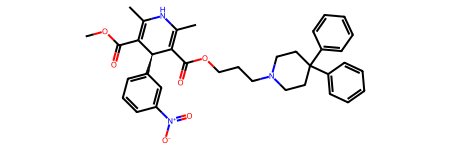

In [46]:
from rdkit.Chem import rdMMPA

mol = Chem.MolFromSmiles('COC(=O)C1=C(C)NC(=C([C@H]1c2cccc(c2)[N+](=O)[O-])C(=O)OCCCN3CCC(CC3)(c4ccccc4)c5ccccc5)C')
mol

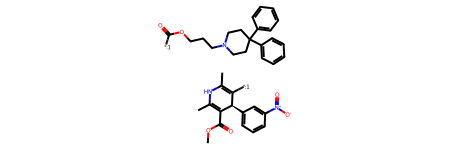

In [57]:
rdMMPA.FragmentMol(mol, maxCuts=1, resultsAsMols=True)[4][1]

In [5]:


# Function to fragment molecules
def fragment_molecules(df):
    fragments = []
    for idx, row in df.iterrows():
        mol = row['Mol']
        try:
            frags = rdMMPA.FragmentMol(mol, maxCuts=1, resultsAsMols=False)
            for _, mols in frags:
                mols = mols.split('.') 
                if len(mols[0]) > len(mols[1]):
                    core = mols[0]
                    chains = mols[1]
                else:
                    core = mols[1]
                    chains = mols[0]
                core = Chem.MolToSmarts(Chem.MolFromSmarts(core))
                chains = Chem.MolToSmarts(Chem.MolFromSmarts(chains))
                fragments.append({
                    'MolIndex': idx,
                    'ID': row['ID'],
                    'Core': core,
                    'Chains': chains,
                    'SMILES': row['SMILES'],
                    'Activity': row['label']
                })
                
        except Exception as e:
            print(f"Error fragmenting molecule at index {idx}: {e}")

    return pd.DataFrame(fragments)


In [6]:
# Fragment active and inactive molecules
active_fragments = fragment_molecules(active_data)
inactive_fragments = fragment_molecules(inactive_data)

In [8]:
# Generate matched molecular pairs
import itertools

# Group fragments by core
active_core_dict = {core: group for core, group in active_fragments.groupby('Core')}
inactive_core_dict = {core: group for core, group in inactive_fragments.groupby('Core')}

common_cores = set(active_core_dict.keys()).intersection(set(inactive_core_dict.keys()))

mmp_list = []

for core in common_cores:
    active_group = active_core_dict[core]
    inactive_group = inactive_core_dict[core]
    
    for idx1, row1 in active_group.iterrows():
        for idx2, row2 in inactive_group.iterrows():
            if row1['Chains'] != row2['Chains']:
                mmp_list.append({
                    'Core': core,
                    'ActiveMolIndex': row1['ID'],
                    'InactiveMolIndex': row2['ID'],
                    'ActiveSMILES': row1['SMILES'],
                    'InactiveSMILES': row2['SMILES'],
                    'ActiveChains': row1['Chains'],
                    'InactiveChains': row2['Chains'],
                })

mmp_pairs_df = pd.DataFrame(mmp_list)

In [41]:
mmp_pairs_df.loc[mmp_pairs_df['ActiveMolIndex'] == 'Tr6561']

,Core,ActiveMolIndex,InactiveMolIndex,ActiveSMILES,InactiveSMILES,ActiveChains,InactiveChains
1,C#CCCCO/N=C1/C[C@@&H1](O)[C@@&H1](O)[C@@&H1]2[...,Tr6561,Tr6926,C[C@H](N1C(=O)[C@H]2CC[C@@H]3[C@H]([C@H](O)[C@...,CCN1C(=O)[C@H]2CC[C@@H]3[C@H]([C@H](O)[C@H](O)...,C[C@&H1](c1ccccc1)[*:1],CC[*:1]
2,C#CCCCO/N=C1/C[C@@&H1](O)[C@@&H1](O)[C@@&H1]2[...,Tr6561,Tr6683,C[C@H](N1C(=O)[C@H]2CC[C@@H]3[C@H]([C@H](O)[C@...,O[C@@H]1C\C(=N\OCCCC#C)\[C@@H]2CC[C@H]3[C@H]([...,C[C@&H1](c1ccccc1)[*:1],c1ccc(C[*:1])cc1
455,C[C@@&H1](c1ccccc1)N1C(=O)[C@&H1]2[C@&H1]3[C@&...,Tr6561,Tr2355,C[C@H](N1C(=O)[C@H]2CC[C@@H]3[C@H]([C@H](O)[C@...,C[C@H](N1C(=O)[C@H]2CC[C@@H]3[C@H]([C@H](O)[C@...,C#CCCC[*:1],CC(=O)OC[C@@&H1]1O[C@@&H1]([*:1])[C@&H1](OC(C)...
456,C[C@@&H1](c1ccccc1)N1C(=O)[C@&H1]2[C@&H1]3[C@&...,Tr6561,Tr4296,C[C@H](N1C(=O)[C@H]2CC[C@@H]3[C@H]([C@H](O)[C@...,CC(C)CO\N=C/1\C[C@@H](O)[C@@H](O)[C@H]2[C@H]1C...,C#CCCC[*:1],CC(C)C[*:1]
2305,C[C@@&H1](c1ccccc1)N1C(=O)[C@&H1]2[C@&H1]3[C@&...,Tr6561,Tr4296,C[C@H](N1C(=O)[C@H]2CC[C@@H]3[C@H]([C@H](O)[C@...,CC(C)CO\N=C/1\C[C@@H](O)[C@@H](O)[C@H]2[C@H]1C...,C#CCC[*:1],CC(C)[*:1]


In [43]:
mmp_pairs_df.loc[mmp_pairs_df['InactiveMolIndex'] == 'Tr6926']

,Core,ActiveMolIndex,InactiveMolIndex,ActiveSMILES,InactiveSMILES,ActiveChains,InactiveChains
1,C#CCCCO/N=C1/C[C@@&H1](O)[C@@&H1](O)[C@@&H1]2[...,Tr6561,Tr6926,C[C@H](N1C(=O)[C@H]2CC[C@@H]3[C@H]([C@H](O)[C@...,CCN1C(=O)[C@H]2CC[C@@H]3[C@H]([C@H](O)[C@H](O)...,C[C@&H1](c1ccccc1)[*:1],CC[*:1]
3,C#CCCCO/N=C1/C[C@@&H1](O)[C@@&H1](O)[C@@&H1]2[...,Tr6524,Tr6926,O[C@@H]1C\C(=N\OCCCC#C)\[C@@H]2CC[C@H]3[C@H]([...,CCN1C(=O)[C@H]2CC[C@@H]3[C@H]([C@H](O)[C@H](O)...,c1ccc(Oc2cccc([*:1])c2)cc1,CC[*:1]
5,C#CCCCO/N=C1/C[C@@&H1](O)[C@@&H1](O)[C@@&H1]2[...,Tr7964,Tr6926,O[C@@H]1C\C(=N\OCCCC#C)\[C@@H]2CC[C@H]3[C@H]([...,CCN1C(=O)[C@H]2CC[C@@H]3[C@H]([C@H](O)[C@H](O)...,c1cc2c(cc1C[*:1])OCO2,CC[*:1]
7,C#CCCCO/N=C1/C[C@@&H1](O)[C@@&H1](O)[C@@&H1]2[...,Tr4354,Tr6926,O[C@@H]1C\C(=N\OCCCC#C)\[C@@H]2CC[C@H]3[C@H]([...,CCN1C(=O)[C@H]2CC[C@@H]3[C@H]([C@H](O)[C@H](O)...,C1CCC([*:1])CC1,CC[*:1]
1013,C#CCCCO/N=C1/C[C@@&H1](O)[C@@&H1](O)[C@@&H1]2[...,Tr7964,Tr6926,O[C@@H]1C\C(=N\OCCCC#C)\[C@@H]2CC[C@H]3[C@H]([...,CCN1C(=O)[C@H]2CC[C@@H]3[C@H]([C@H](O)[C@H](O)...,c1cc2c(cc1[*:1])OCO2,C[*:1]
1721,CCN1C(=O)[C@&H1]2[C@&H1]3[C@&H1](O)[C@&H1](O)C...,Tr6449,Tr6926,CCCNC(=O)OC[C@H]1O[C@@H](CCO\N=C/2\C[C@@H](O)[...,CCN1C(=O)[C@H]2CC[C@@H]3[C@H]([C@H](O)[C@H](O)...,CCCNC(=O)OC[C@&H1]1O[C@&H1]([*:1])C=C[C@@&H1]1...,C#CC[*:1]
2232,CCN1C(=O)[C@&H1]2[C@&H1]3[C@&H1](O)[C@&H1](O)C...,Tr6449,Tr6926,CCCNC(=O)OC[C@H]1O[C@@H](CCO\N=C/2\C[C@@H](O)[...,CCN1C(=O)[C@H]2CC[C@@H]3[C@H]([C@H](O)[C@H](O)...,CCCNC(=O)OC[C@&H1]1O[C@@&H1](C[*:1])C=C[C@@&H1...,C#CCC[*:1]
3003,CCN1C(=O)[C@&H1]2[C@&H1]3[C@&H1](O)[C@&H1](O)C...,Tr3663,Tr6926,CCN1C(=O)[C@H]2CC[C@@H]3[C@H]([C@H](O)[C@H](O)...,CCN1C(=O)[C@H]2CC[C@@H]3[C@H]([C@H](O)[C@H](O)...,Cc1cc(C)c(-c2cc([C@&H1](C)[*:1])on2)c(C)c1,C#CCCC[*:1]
3015,CCN1C(=O)[C@&H1]2[C@&H1]3[C@&H1](O)[C@&H1](O)C...,Tr6449,Tr6926,CCCNC(=O)OC[C@H]1O[C@@H](CCO\N=C/2\C[C@@H](O)[...,CCN1C(=O)[C@H]2CC[C@@H]3[C@H]([C@H](O)[C@H](O)...,CCCNC(=O)OC[C@&H1]1O[C@@&H1](CC[*:1])C=C[C@@&H...,C#CCCC[*:1]
3027,CCN1C(=O)[C@&H1]2[C@&H1]3[C@&H1](O)[C@&H1](O)C...,Tr6751,Tr6926,CCN1C(=O)[C@H]2CC[C@@H]3[C@H]([C@H](O)[C@H](O)...,CCN1C(=O)[C@H]2CC[C@@H]3[C@H]([C@H](O)[C@H](O)...,Cc1cc2c(nc1C)CCCCN2C[C@&H1](C)[*:1],C#CCCC[*:1]


In [11]:
test = data.drop(columns=['Mol'])
test 

,ID,SMILES,Class,label,splits
0,Tr1,CN(C)c1nc(nc(n1)N(C)C)N(C)C,Inactive,0,train
1,Tr10,CN(C)C(=O)N=NC(=O)N(C)C,Inactive,0,train
2,Tr1000,CC(=O)NS(=O)(=O)c1ccc(NC(=S)NC(=O)C(C)(C)C)cc1,Inactive,0,train
3,Tr1001,C1CC2(CCN1)CN(C2)c3cccc(c3)c4ccccc4,Inactive,0,train
4,Tr1002,CCN1CCC[C@H](C1)OC(=O)C(c2ccccc2)c3ccccc3,Active,1,train
...,...,...,...,...,...
9116,Tr7412,Sc1nnc(C2=CC=CN(Cc3ccccc3)C2=O)n1CC=C,Active,1,train
9117,Tr996,C[N+](C)(C)C1=NNC2=Nc3ccccc3SC2=C1,Inactive,0,train
9118,Tr997,CC(C)C(=O)Nc1ccc(Sc2ccc(F)cc2)cc1,Inactive,0,train
9119,Tr998,O=C(N1CCC2(CC1)CN(C2)c3ncccn3)c4ccncc4,Inactive,0,train


In [44]:
for mol_id in test['ID']:

    if test.loc[test['ID'] == mol_id, 'label'].iloc[0] == 1:
        list_smarts = mmp_pairs_df.loc[mmp_pairs_df['ActiveMolIndex'] == mol_id, 'ActiveChains'].unique().tolist()
    else:
        list_smarts = mmp_pairs_df.loc[mmp_pairs_df['InactiveMolIndex'] == mol_id, 'InactiveChains'].unique().tolist()
    
    test.loc[test['ID'] == mol_id, 'smarts'] = str(list_smarts)



In [45]:
test.to_csv('trial.csv')